# Data Loading

In [3900]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

import gender_guesser.detector as gender
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, PowerTransformer, MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, roc_curve, auc, confusion_matrix, classification_report
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, train_test_split

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, Pool

In [3901]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [3902]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,3576.00,0.00,6715.00,49.00,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,1283.00,371.00,3329.00,193.00,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True


In [3903]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.00,False,0.00,0.00,0.00,0.00,0.00,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.00,False,0.00,9.00,0.00,2823.00,0.00,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.00,False,0.00,0.00,0.00,0.00,0.00,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.00,False,0.00,6652.00,0.00,181.00,585.00,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.00,False,10.00,0.00,635.00,0.00,0.00,Brence Harperez


In [3904]:
print(f'Shape of train set: {train.shape}')
print(f'Shape of test set: {test.shape}')

Shape of train set: (8693, 14)
Shape of test set: (4277, 13)


In [3905]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [3906]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [3907]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,8514.00,28.83,14.49,0.00,19.00,27.00,38.00,79.00
RoomService,8512.00,224.69,666.72,0.00,0.00,0.00,47.00,14327.00
FoodCourt,8510.00,458.08,1611.49,0.00,0.00,0.00,76.00,29813.00
ShoppingMall,8485.00,173.73,604.70,0.00,0.00,0.00,27.00,23492.00
Spa,8510.00,311.14,1136.71,0.00,0.00,0.00,59.00,22408.00
VRDeck,8505.00,304.85,1145.72,0.00,0.00,0.00,46.00,24133.00


In [3908]:
test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,4186.00,28.66,14.18,0.00,19.00,26.00,37.00,79.00
RoomService,4195.00,219.27,607.01,0.00,0.00,0.00,53.00,11567.00
FoodCourt,4171.00,439.48,1527.66,0.00,0.00,0.00,78.00,25273.00
ShoppingMall,4179.00,177.30,560.82,0.00,0.00,0.00,33.00,8292.00
Spa,4176.00,303.05,1117.19,0.00,0.00,0.00,50.00,19844.00
VRDeck,4197.00,310.71,1246.99,0.00,0.00,0.00,36.00,22272.00


### Missing values

In [3909]:
train.isna().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

In [3910]:
test.isna().sum().sort_values(ascending=False)

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64

<AxesSubplot: >

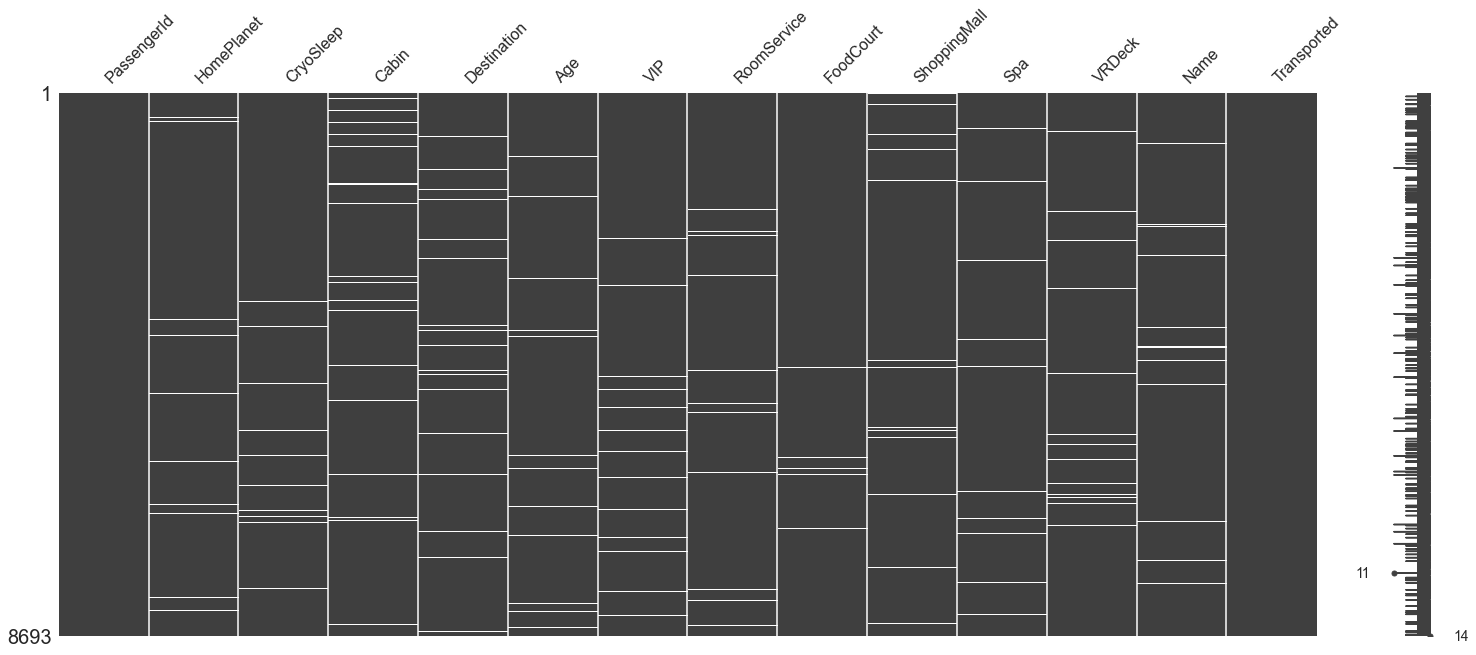

In [3911]:
import missingno as msno
msno.matrix(train)

<AxesSubplot: >

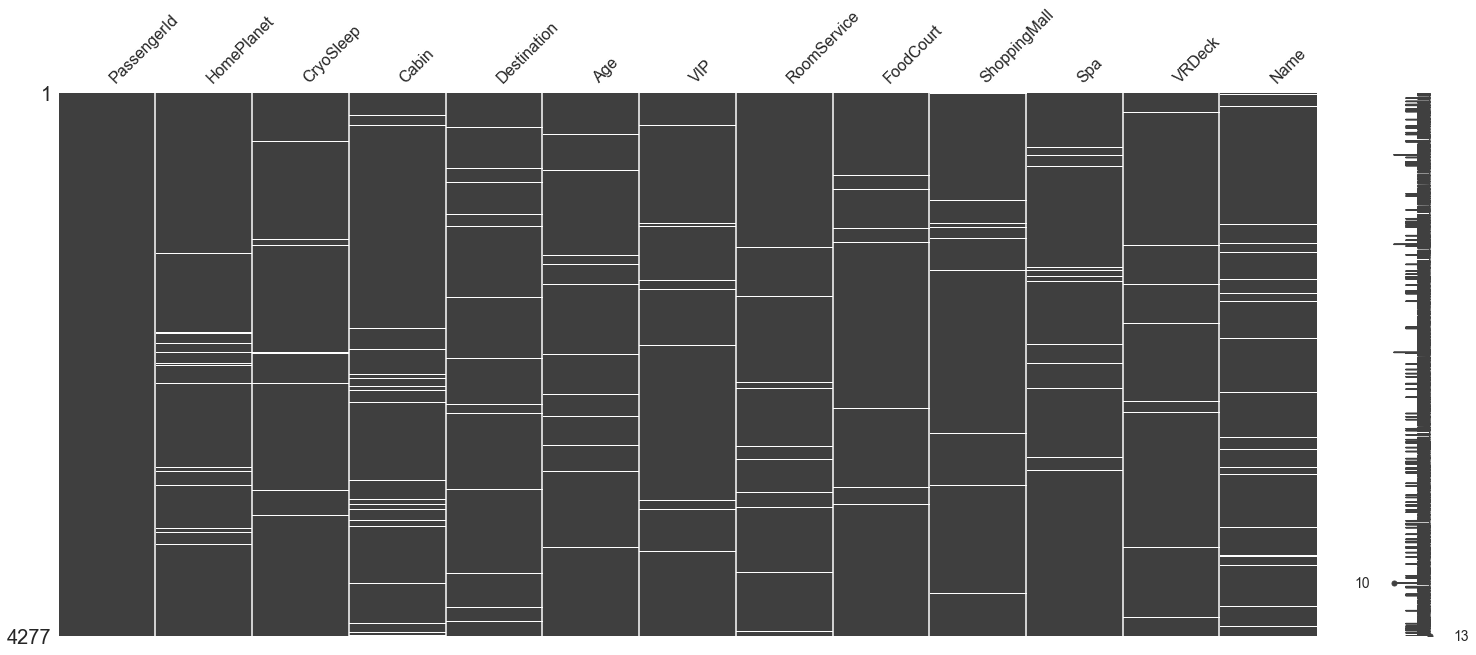

In [3912]:
msno.matrix(test)

In [3913]:
train.isna().sum(axis=1).sort_values(ascending=False).iloc[:5]

3882    3
7211    3
2639    3
4164    3
7682    3
dtype: int64

In [3914]:
test.isna().sum(axis=1).sort_values(ascending=False).iloc[:5]

1192    3
2042    3
488     3
3858    3
2754    2
dtype: int64

# EDA and Pre-processing

### Initialize

In [3915]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,3576.00,0.00,6715.00,49.00,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,1283.00,371.00,3329.00,193.00,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True


Percentage of people who transported: 50.36


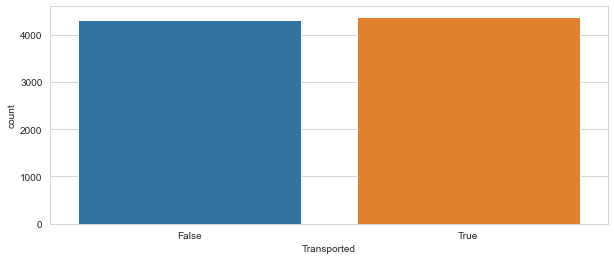

In [3916]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Transported', data=train)
print(f"Percentage of people who transported: {train['Transported'].value_counts().iloc[0] / train.shape[0] * 100:.2f}")

In [3917]:
for col in train.columns:
    if train[col].dtype == 'object':
        print(f'Object column {col} has {train[col].nunique()}')

Object column PassengerId has 8693
Object column HomePlanet has 3
Object column CryoSleep has 2
Object column Cabin has 6560
Object column Destination has 3
Object column VIP has 2
Object column Name has 8473


Notes: 

* PassengerId, Cabin and Name are text columns
* HomePlanet, CryoSleep, Destination and VIP are categorical columns
* Age, RoomService, FoodCourt, ShoppingMall, Spa and VRDeck are numerical columns

### Feature extraction

##### Age

<AxesSubplot: xlabel='Age', ylabel='Count'>

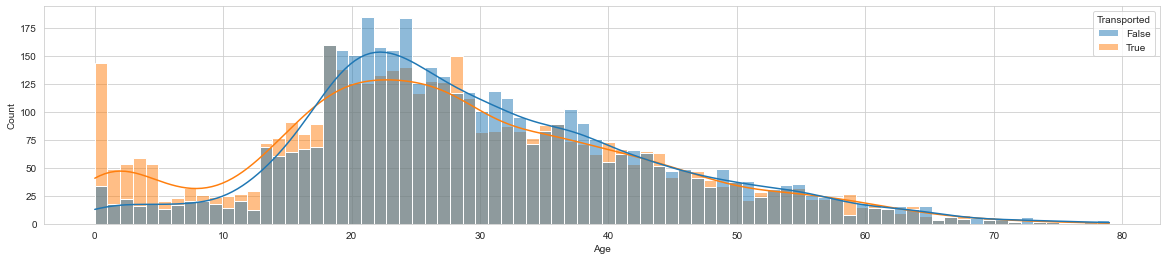

In [3918]:
# draw histplot of Age column hue by Transported column
plt.figure(figsize=(20, 4))
sns.histplot(x='Age', hue='Transported', data=train, kde=True, bins=80)

In [3919]:
# impute missing Age values
train.loc[train['Age'].isna(), 'Age'] = train.groupby(['HomePlanet', 'VIP']).Age.apply(lambda x: x.fillna(x.median()))
test.loc[test['Age'].isna(), 'Age'] = test.groupby(['HomePlanet', 'VIP']).Age.apply(lambda x: x.fillna(x.median()))
# impute remaining missing Age values
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())

<AxesSubplot: xlabel='AgeGroup', ylabel='count'>

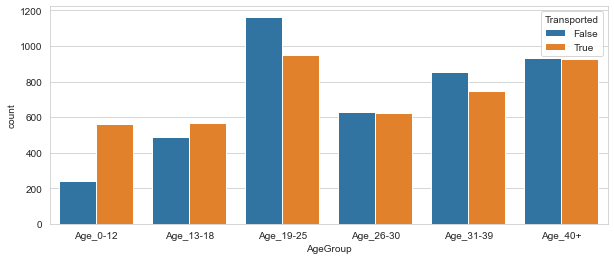

In [3920]:
train['AgeGroup'] = pd.cut(train['Age'], bins=[-0.1, 12.01, 18.01, 25.01, 30.01, 39.01, 100], labels=['Age_0-12', 'Age_13-18', 'Age_19-25', 'Age_26-30', 'Age_31-39', 'Age_40+'])
test['AgeGroup'] = pd.cut(test['Age'], bins=[-0.1, 12.01, 18.01, 25.01, 30.01, 39.01, 100], labels=['Age_0-12', 'Age_13-18', 'Age_19-25', 'Age_26-30', 'Age_31-39', 'Age_40+'])

plt.figure(figsize=(10, 4))
sns.countplot(x='AgeGroup', hue='Transported', data=train)

<AxesSubplot: xlabel='IsChild', ylabel='count'>

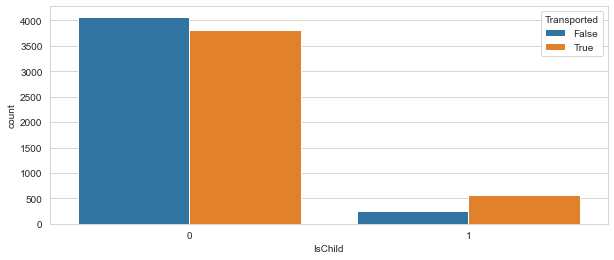

In [3921]:
train['IsChild'] = train['Age'].apply(lambda x: 1 if x <= 12 else 0)
test['IsChild'] = test['Age'].apply(lambda x: 1 if x <= 12 else 0)

plt.figure(figsize=(10, 4))
sns.countplot(x='IsChild', hue='Transported', data=train)

##### RoomService, FoodCourt, ShoppingMall, Spa and VRDeck

In [3922]:
cont_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in cont_features:
    #train[col] = train[col].fillna(train[col].mean())
    train[col] = train[col].fillna(train.groupby(['IsChild', 'CryoSleep'])[col].transform('median'))
    train[col] = train[col].fillna(0)
    #test[col] = test[col].fillna(test[col].mean())
    test[col] = test[col].fillna(test.groupby(['IsChild', 'CryoSleep'])[col].transform('median'))
    test[col] = test[col].fillna(0)

In [3923]:
# sum all spendings to get total spending
train['TotalSpending'] = train[cont_features].sum(axis=1)
test['TotalSpending'] = test[cont_features].sum(axis=1)
cont_features.append('TotalSpending')
train['LuxurySpending'] = train['RoomService'] + train['Spa'] + train['VRDeck']
test['LuxurySpending'] = test['RoomService'] + test['Spa'] + test['VRDeck']
cont_features.append('LuxurySpending')
train['EssentialSpending'] = train['FoodCourt'] + train['ShoppingMall']
test['EssentialSpending'] = test['FoodCourt'] + test['ShoppingMall']
cont_features.append('EssentialSpending')

train[cont_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RoomService,8693.00,220.12,660.48,0.00,0.00,0.00,41.00,14327.00
FoodCourt,8693.00,448.61,1595.74,0.00,0.00,0.00,61.00,29813.00
ShoppingMall,8693.00,169.64,597.99,0.00,0.00,0.00,22.00,23492.00
Spa,8693.00,304.79,1125.51,0.00,0.00,0.00,53.00,22408.00
VRDeck,8693.00,298.38,1134.10,0.00,0.00,0.00,40.00,24133.00
TotalSpending,8693.00,1441.54,2803.12,0.00,0.00,717.00,1442.00,35987.00
LuxurySpending,8693.00,823.29,1830.95,0.00,0.00,60.00,849.00,28600.00
EssentialSpending,8693.00,618.25,1696.44,0.00,0.00,3.00,601.00,29813.00


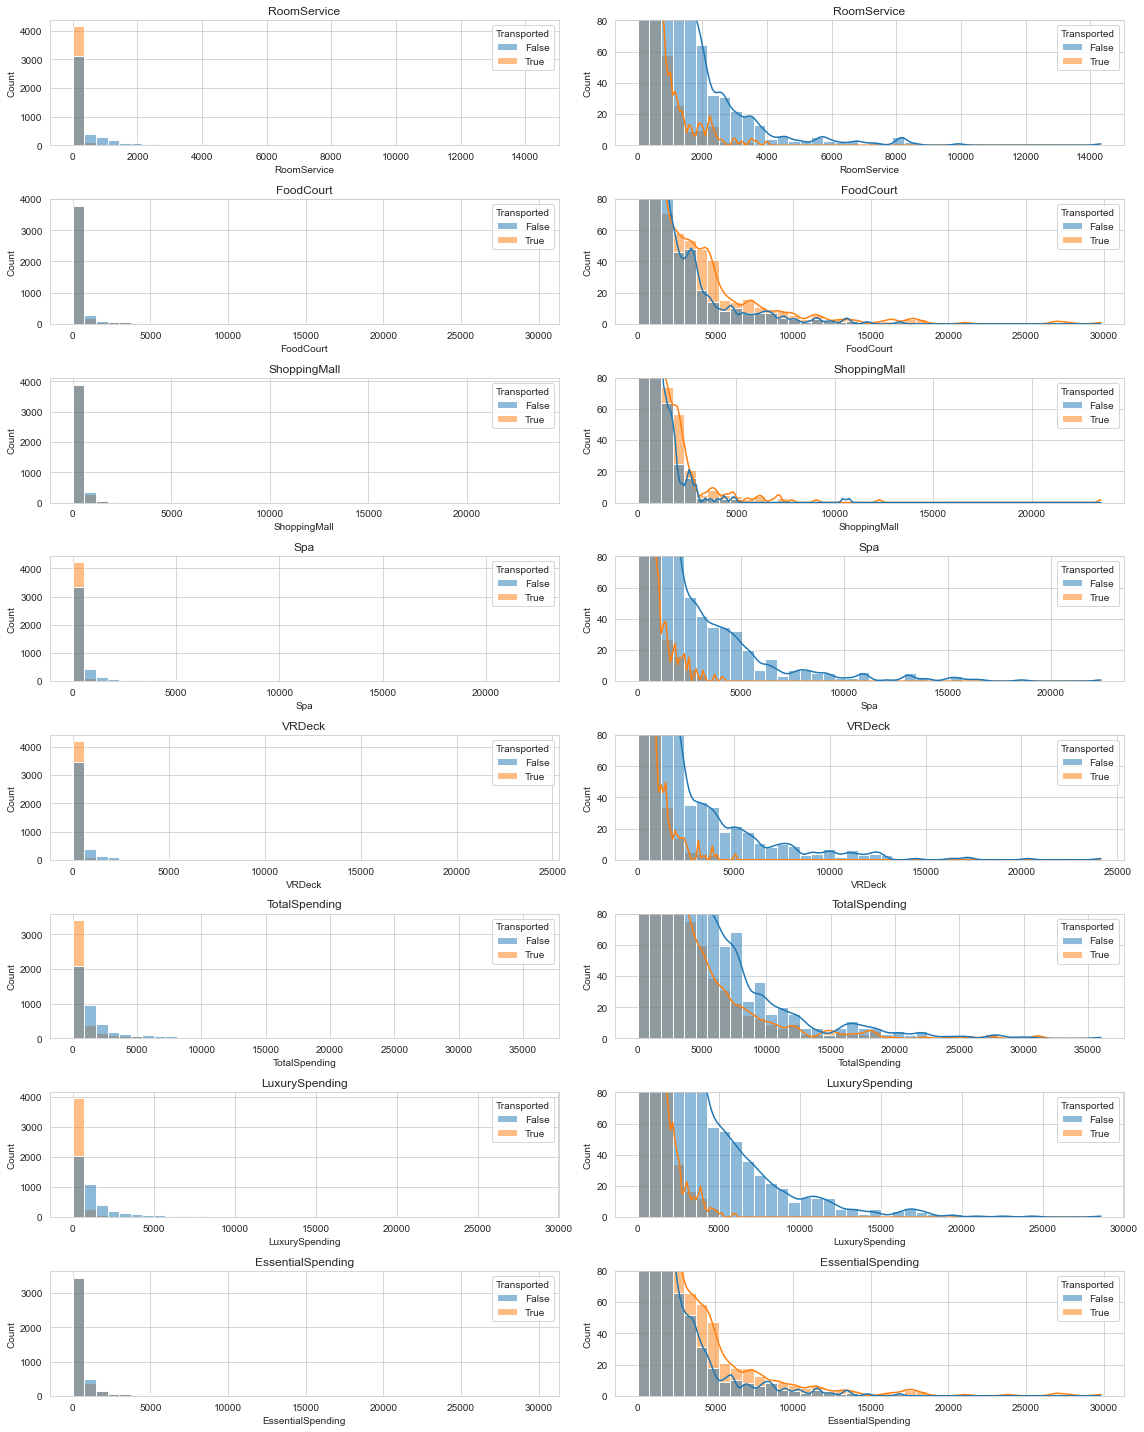

In [3924]:
# draw histplot of cont_features columns hue by Transported column in for loop (2, 3)
fig = plt.figure(figsize=(16, 20))
for i, col in enumerate(cont_features):
    ax = fig.add_subplot(len(cont_features), 2, 2*i+1)
    sns.histplot(x=col, hue='Transported', data=train, kde=False, bins=40, axes=ax)
    ax.set_title(col)

    ax = fig.add_subplot(len(cont_features), 2, 2*i+2)
    sns.histplot(x=col, hue='Transported', data=train, kde=True, bins=40, axes=ax)
    ax.set_title(col)
    plt.ylim([0,80])
fig.tight_layout()

<AxesSubplot: xlabel='AnySpending', ylabel='count'>

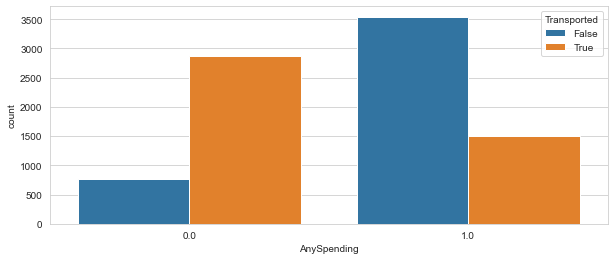

In [3925]:
# add AnySpending column if TotalSpending>0 => 1, elif TotalSpending=0 => 0
train['AnySpending'] = np.where(train['TotalSpending']>0, 1, np.where(train['TotalSpending']==0, 0, np.nan))
test['AnySpending'] = np.where(test['TotalSpending']>0, 1, np.where(test['TotalSpending']==0, 0, np.nan))

# draw countplot of AnySpending column hue by Transported column
plt.figure(figsize=(10, 4))
sns.countplot(x='AnySpending', hue='Transported', data=train)

In [3926]:
%%script echo skipped
# boxcox transformation for cont_features columns
pt = PowerTransformer()
for col in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    train[col] = pt.fit_transform(train[col].values.reshape(-1, 1))
    test[col] = pt.transform(test[col].values.reshape(-1, 1))

train[cont_features].describe().transpose()

skipped


In [3927]:
train.drop(columns=['TotalSpending', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], inplace=True)
test.drop(columns=['TotalSpending', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], inplace=True)

##### PassengerId

In [3928]:
# split PassengerId column by "_" and create new column
train['Group'] = train['PassengerId'].apply(lambda x: x.split('_')[0]).astype('int')
test['Group'] = test['PassengerId'].apply(lambda x: x.split('_')[0]).astype('int')
# add a new column as concatenating train and test sets and counting values of each group
train['GroupSize'] = train['Group'].map(lambda x: pd.concat([train['Group'], test['Group']]).value_counts()[x])
test['GroupSize'] = test['Group'].map(lambda x: pd.concat([train['Group'], test['Group']]).value_counts()[x])

<AxesSubplot: xlabel='GroupSize', ylabel='count'>

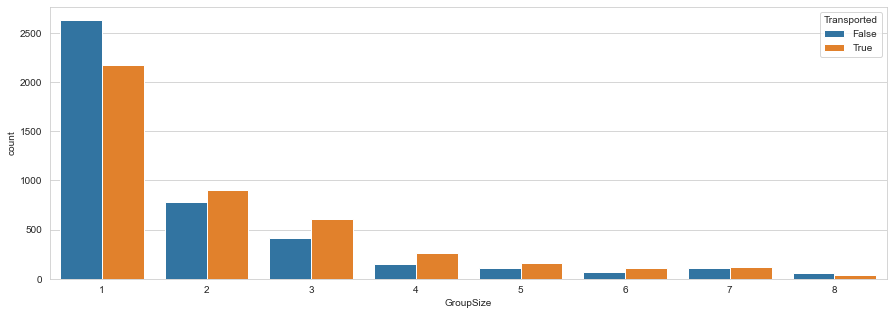

In [3929]:
# draw countplot of GroupSize hue by Transported
plt.figure(figsize=(15, 5))
sns.countplot(x='GroupSize', data=train, hue='Transported')

In [3930]:
train['Solo'] = train['GroupSize'].apply(lambda x: 1 if x == 1 else 0)
test['Solo'] = test['GroupSize'].apply(lambda x: 1 if x == 1 else 0)

<AxesSubplot: xlabel='Solo', ylabel='count'>

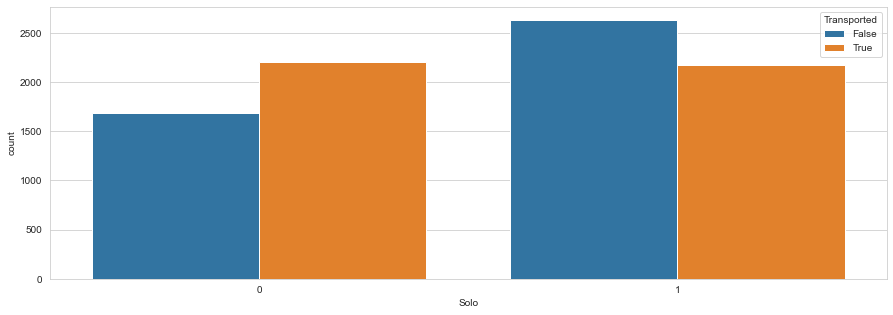

In [3931]:
# draw countplot of Solo hue by Transported
plt.figure(figsize=(15, 5))
sns.countplot(x='Solo', data=train, hue='Transported')

In [3932]:
# drop PassengerId column since it is unique for each row and they are not useful for prediction
train.drop(['PassengerId'], axis=1, inplace=True)
test.drop(['PassengerId'], axis=1, inplace=True)

##### Name

In [3933]:
# fillna Name column with 'Unknown_name'
train['Name'].fillna('Unknown_name', inplace=True)
test['Name'].fillna('Unknown_name', inplace=True)

# extract LName from Name column
train['LName'] = train['Name'].str.split(' ').str[-1]
test['LName'] = test['Name'].str.split(' ').str[-1]

# calculate family size by summing up same LName columns
train['FamilySize'] = train['LName'].map(lambda x: pd.concat([train['LName'], test['LName']]).value_counts()[x])
test['FamilySize'] = test['LName'].map(lambda x: pd.concat([train['LName'], test['LName']]).value_counts()[x])

# put nans back to Name column
train['Name'].replace('Unknown_name', np.nan, inplace=True)
test['Name'].replace('Unknown_name', np.nan, inplace=True)

<AxesSubplot: xlabel='FamilySize', ylabel='count'>

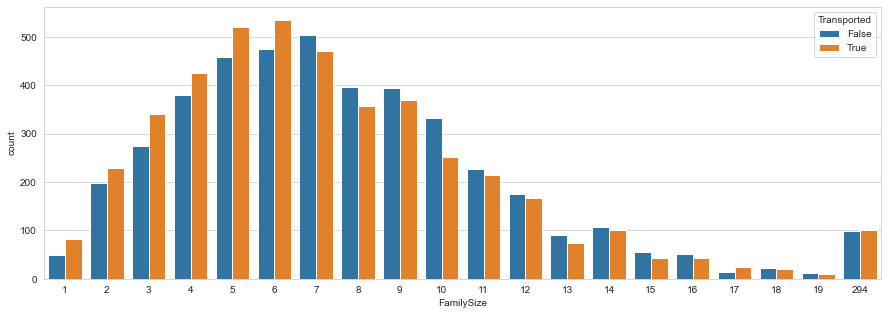

In [3934]:
# draw countplot of FamilySize hue by Transported
plt.figure(figsize=(15, 5))
sns.countplot(x='FamilySize', data=train, hue='Transported')

In [3935]:
# extract Fname from Name column
train['FName'] = train['Name'].str.split(' ').str[0]

gd = gender.Detector()
train['Gender'] = train['FName'].map(lambda x: gd.get_gender(x))
train['Gender'].value_counts()

unknown          7284
female            811
male              423
mostly_male        81
andy               71
mostly_female      23
Name: Gender, dtype: int64

In [3936]:
# drop Name, FName and Gender columns since they are generated names and not useful for prediction
train.drop(['Name', 'LName', 'FName', 'Gender'], axis=1, inplace=True)
test.drop(['Name', 'LName'], axis=1, inplace=True)

##### Cabin

In [3937]:
train['Cabin'].head(5)

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
Name: Cabin, dtype: object

In [3938]:
# split Cabin column with not nan values by "/" and create new columns
train['CabinDeck'] = train['Cabin'].apply(lambda x: x.split('/')[0] if pd.notnull(x) else x)
train['CabinDeck'].value_counts().head(10)

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: CabinDeck, dtype: int64

<AxesSubplot: xlabel='CabinDeck', ylabel='count'>

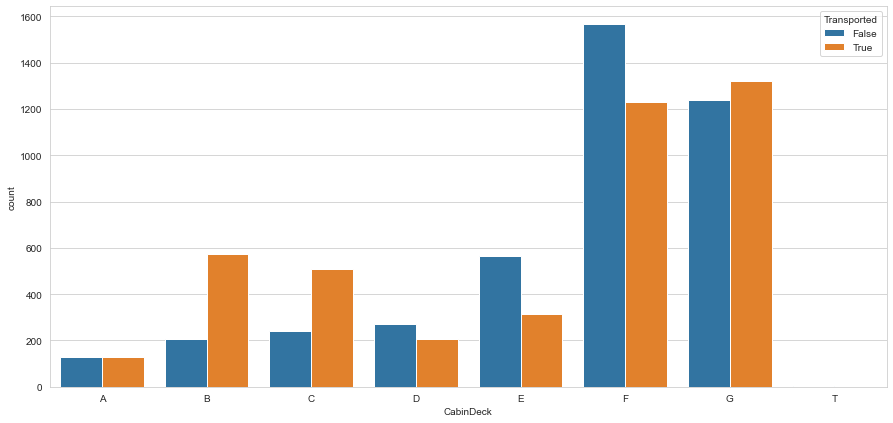

In [3939]:
# draw countplot for CabinDeck column hue by Transported column
plt.figure(figsize=(15, 7))
sns.countplot(x='CabinDeck', data=train, hue='Transported', order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'])

In [3940]:
train['CabinNumber'] = train['Cabin'].apply(lambda x: x.split('/')[1] if pd.notnull(x) else x)

# # draw countplot for CabinNumber column hue by Transported column
# plt.figure(figsize=(15, 5))
# sns.histplot(x='CabinNumber', data=train, hue='Transported')

<AxesSubplot: xlabel='CabinSide', ylabel='count'>

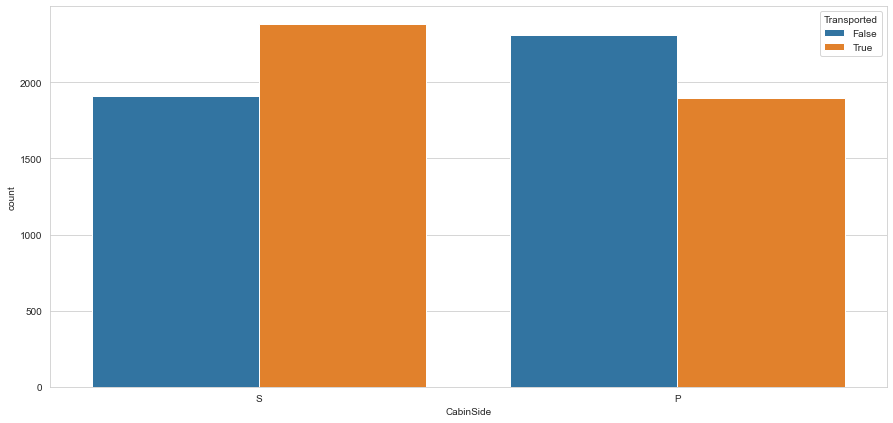

In [3941]:
train['CabinSide'] = train['Cabin'].apply(lambda x: x.split('/')[2] if pd.notnull(x) else x)

# draw countplot for CabinSide column hue by Transported column
plt.figure(figsize=(15, 7))
sns.countplot(x='CabinSide', data=train, hue='Transported', order=train['CabinSide'].value_counts().index)

In [3942]:
# drop Cabin and CabinNumber columns since they are not useful for prediction
train.drop(['Cabin', 'CabinNumber'], axis=1, inplace=True)

# add CabinDeck and CabinDeck columns and drop Cabin columns for test set
test['CabinDeck'] = test['Cabin'].apply(lambda x: x.split('/')[0] if pd.notnull(x) else x)
test['CabinSide'] = test['Cabin'].apply(lambda x: x.split('/')[2] if pd.notnull(x) else x)
test.drop(['Cabin'], axis=1, inplace=True)

##### HomePlanet, CryoSleep, Destination, VIP, CabinDeck and CabinSide

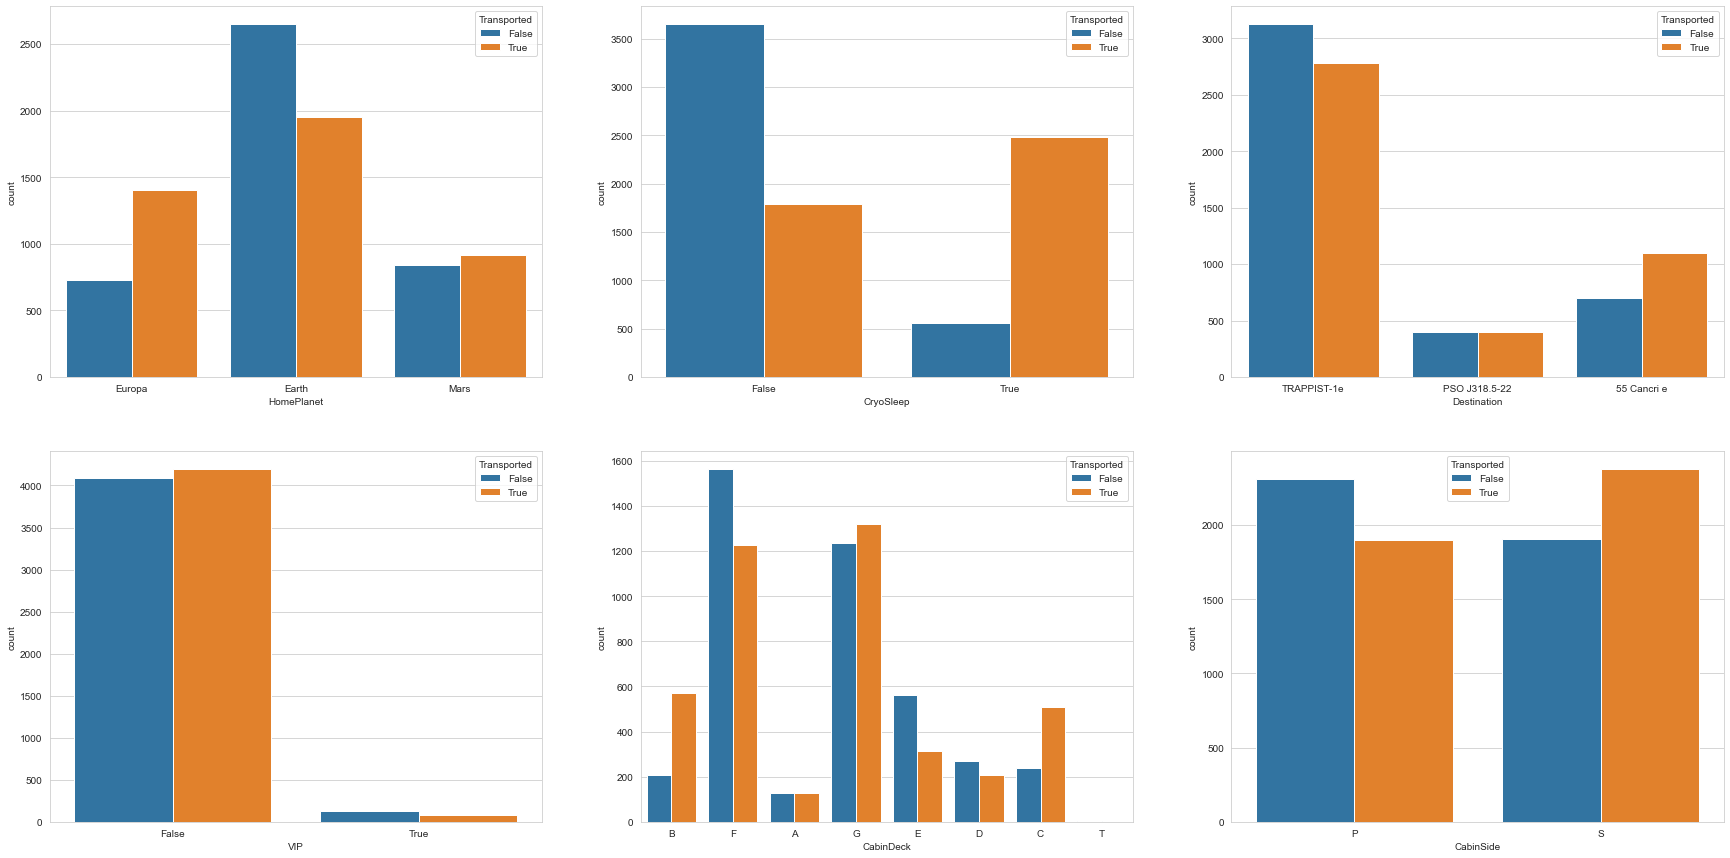

In [3943]:
# draw countplot for HomePlanet, CryoSleep, Destionation, VIP, CabinDeck and CabinSide columns hue by Transported column using subplot and for loop
cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinDeck', 'CabinSide']
fig, axes = plt.subplots(2, 3, figsize=(30, 15))
for i, col in enumerate(cat_features):
    sns.countplot(x=col, data=train, hue='Transported', ax=axes[i//3, i%3])

In [3944]:
%%script echo skipped
# ordinal encode categorical columns
oc = OrdinalEncoder()
cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinDeck', 'CabinSide']

train[cat_features] = oc.fit_transform(train[cat_features])
test[cat_features] = oc.transform(test[cat_features])

skipped


### Missing value imputation

In [3945]:
label_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'AgeGroup', 'CabinDeck', 'CabinSide']
train.isna().sum()

HomePlanet           201
CryoSleep            217
Destination          182
Age                    0
VIP                  203
Transported            0
AgeGroup               0
IsChild                0
LuxurySpending         0
EssentialSpending      0
AnySpending            0
Group                  0
GroupSize              0
Solo                   0
FamilySize             0
CabinDeck            199
CabinSide            199
dtype: int64

##### CryoSleep

<AxesSubplot: xlabel='CryoSleep', ylabel='count'>

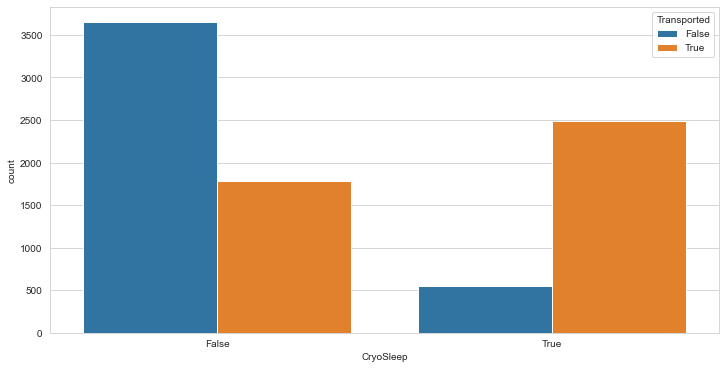

In [3946]:
# draw countplot for CryoSleep column hue by Transported column
plt.figure(figsize=(12, 6))
sns.countplot(x='CryoSleep', data=train, hue='Transported')

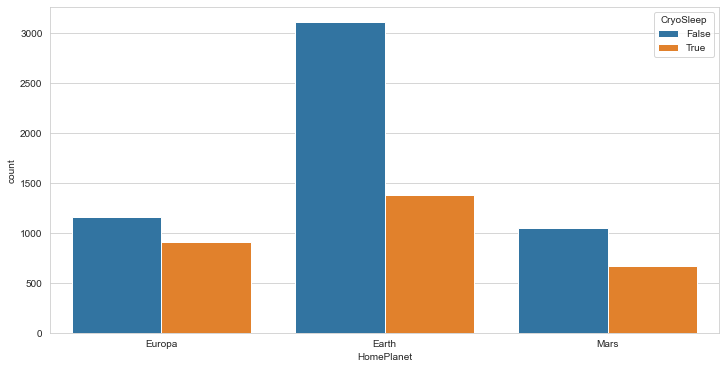

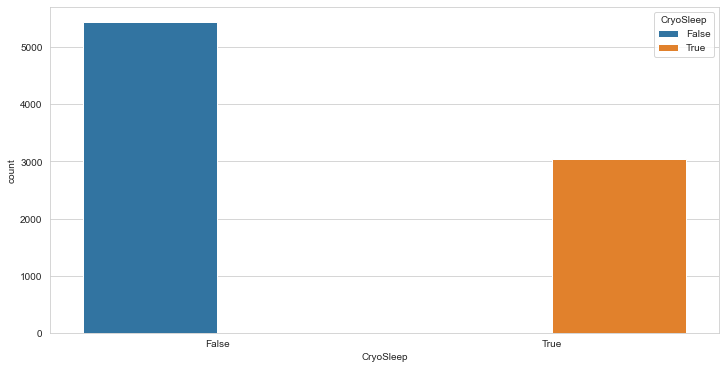

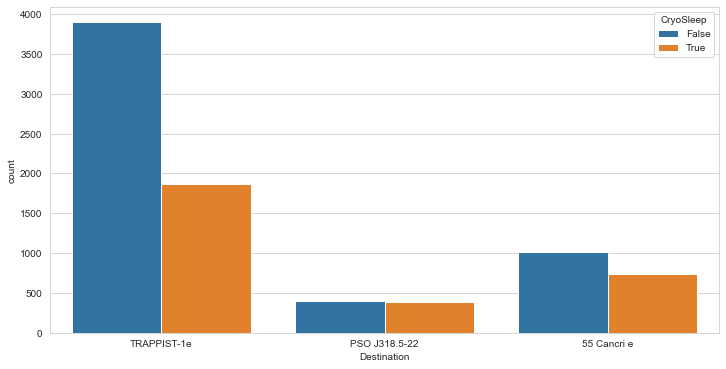

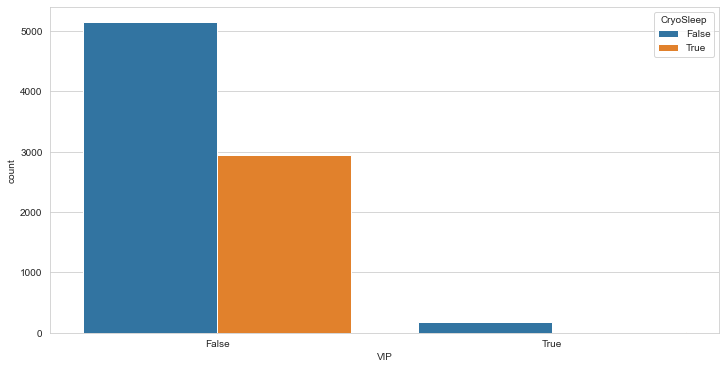

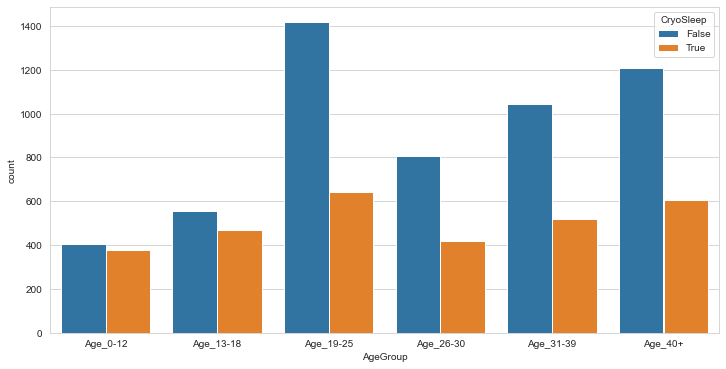

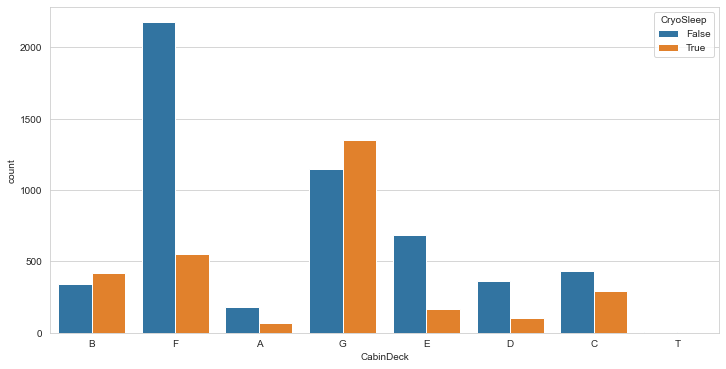

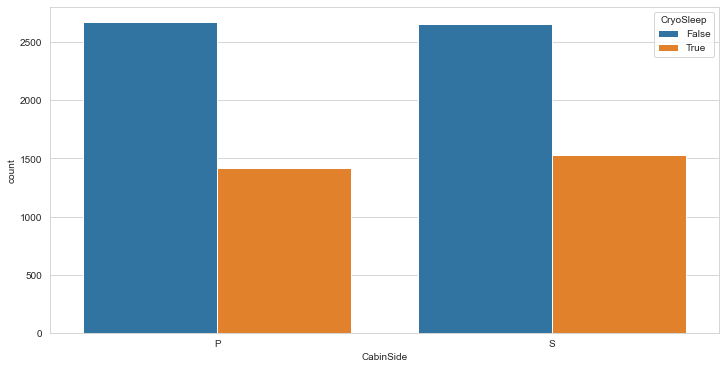

In [3947]:
# compare CryoSleep with all other columns by ploting countplot
for col in label_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, data=train, hue='CryoSleep')

##### VIP

<AxesSubplot: xlabel='VIP', ylabel='count'>

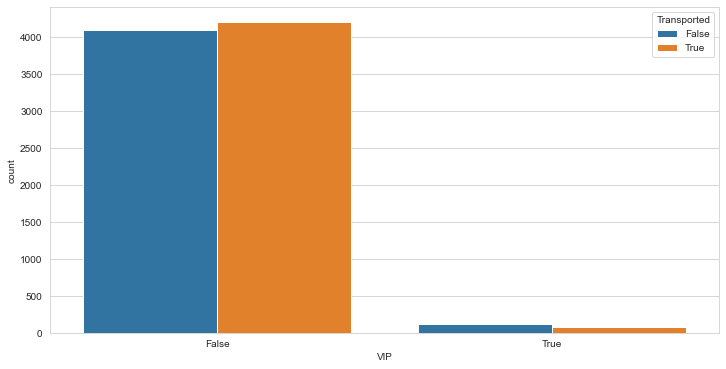

In [3948]:
# draw countplot for CryoSleep column hue by Transported column
plt.figure(figsize=(12, 6))
sns.countplot(x='VIP', data=train, hue='Transported')

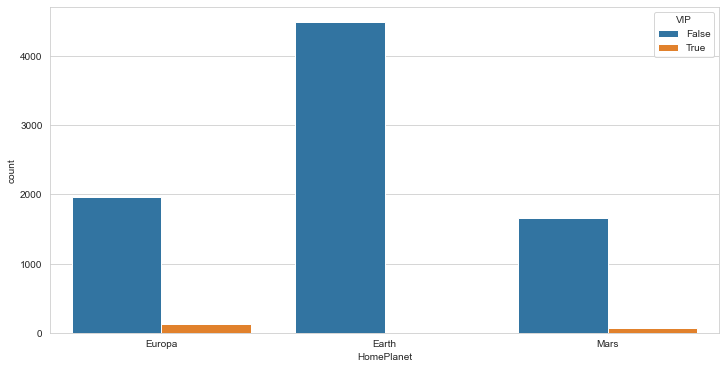

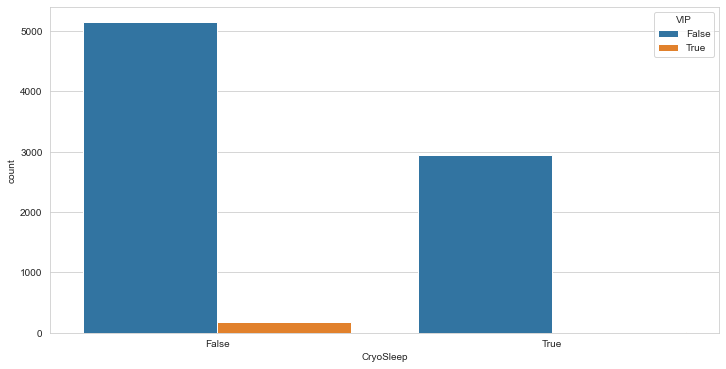

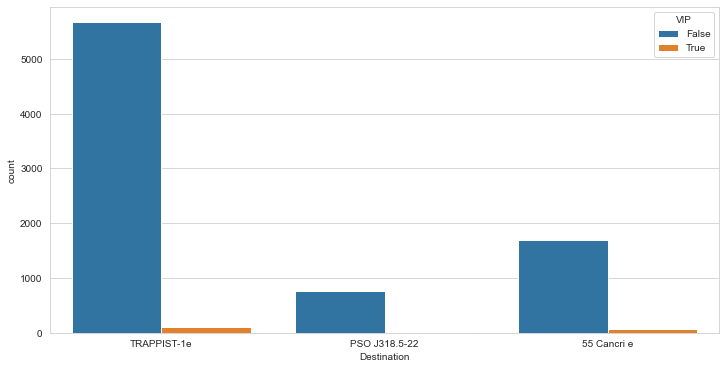

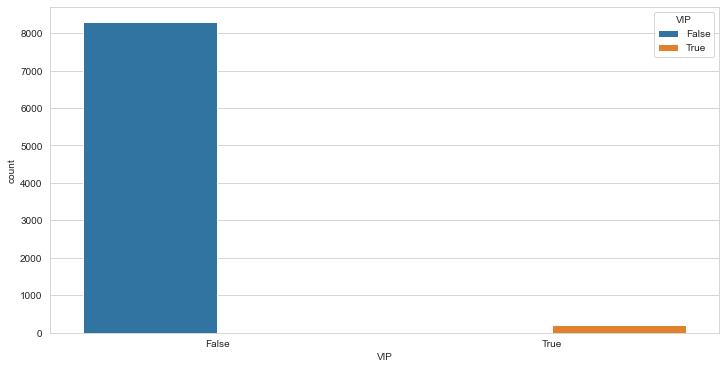

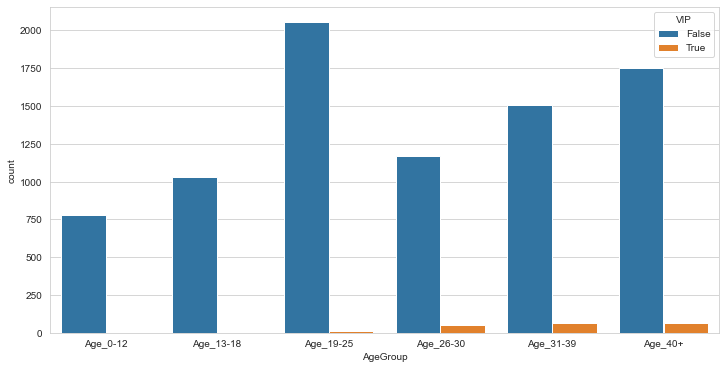

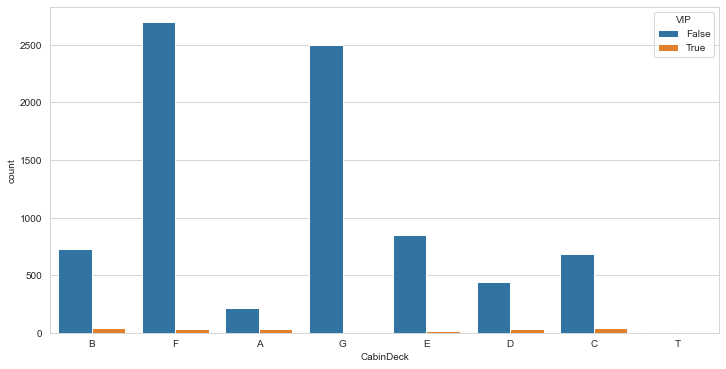

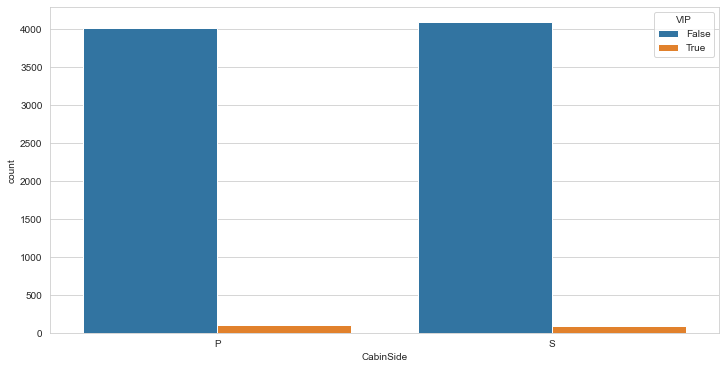

In [3949]:
# compare VIP with all other columns by ploting countplot
for col in label_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, data=train, hue='VIP')

In [3950]:
# fill missing VIP columns with 0
train['VIP'].fillna(False, inplace=True)
test['VIP'].fillna(False, inplace=True)

##### CabinDeck

<AxesSubplot: xlabel='CabinDeck', ylabel='count'>

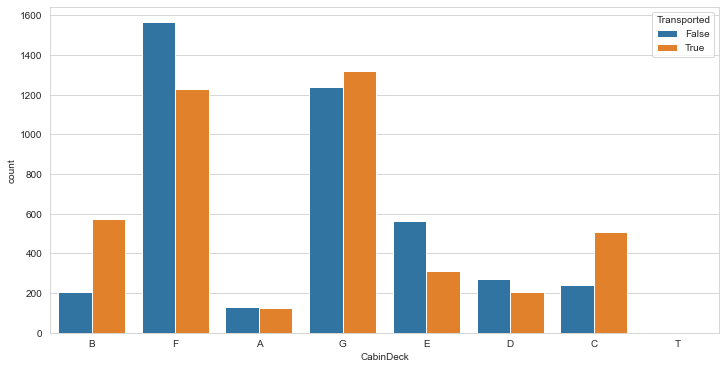

In [3951]:
# draw countplot for CabinDeck column hue by Transported column
plt.figure(figsize=(12, 6))
sns.countplot(x='CabinDeck', data=train, hue='Transported')

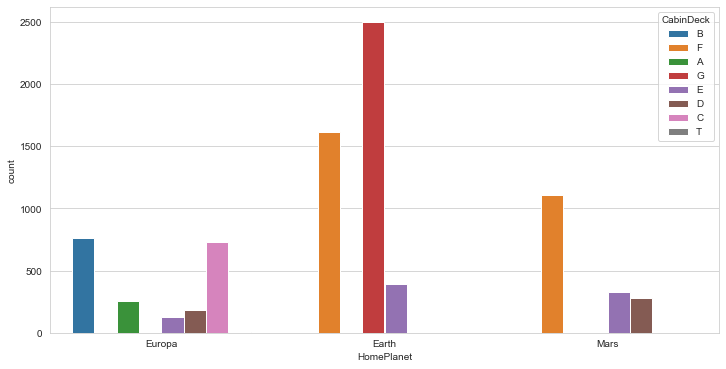

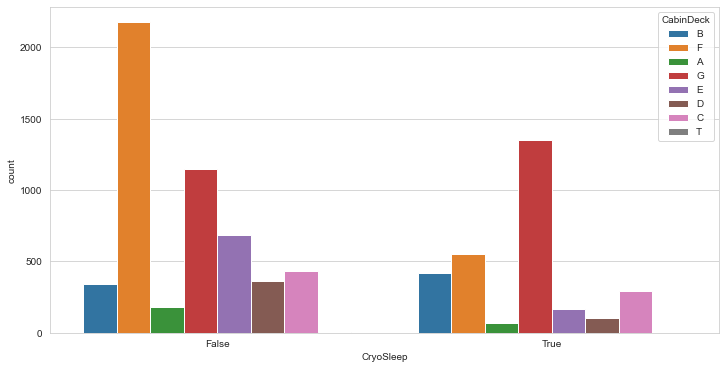

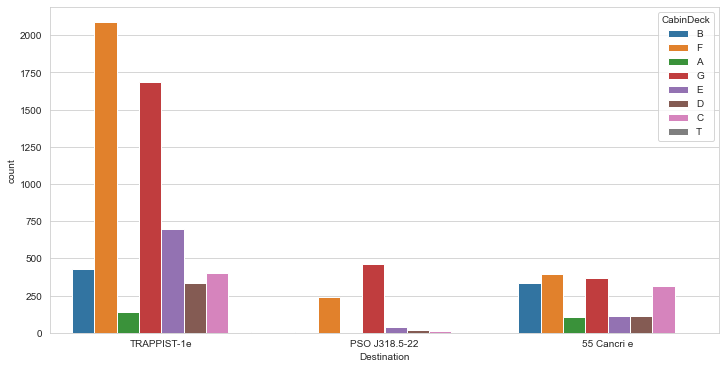

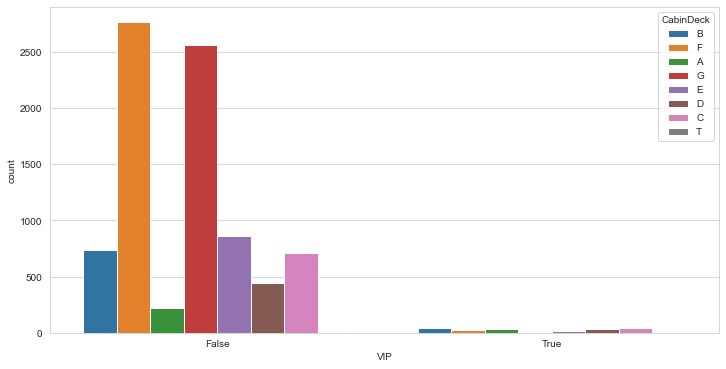

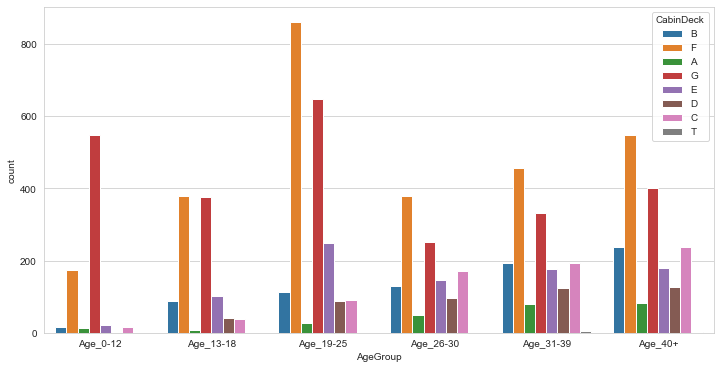

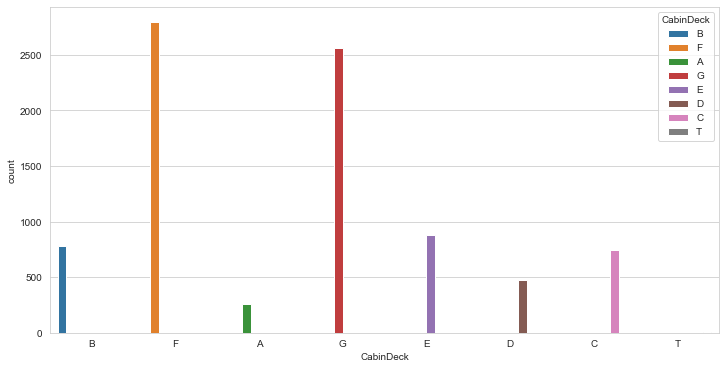

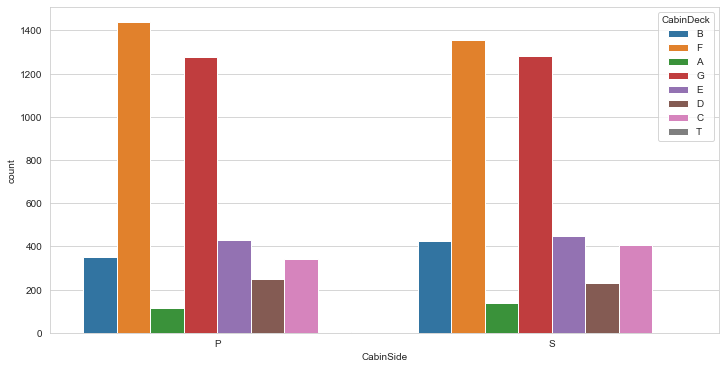

In [3952]:
# compare CabinDeck with all other columns by ploting
for col in label_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, data=train, hue='CabinDeck')

##### CabinSide

<AxesSubplot: xlabel='CabinSide', ylabel='count'>

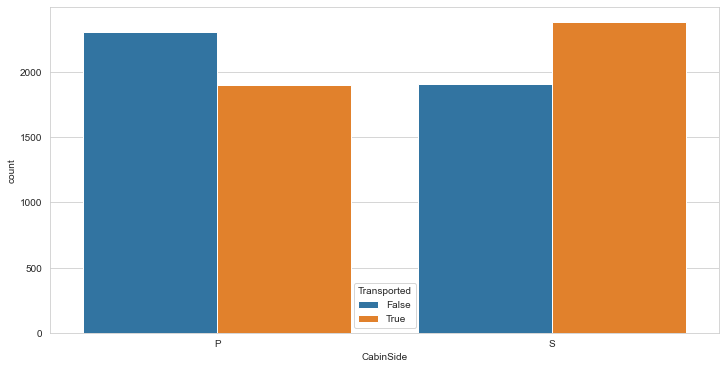

In [3953]:
# draw countplot for CabinSide column hue by Transported column
plt.figure(figsize=(12, 6))
sns.countplot(x='CabinSide', data=train, hue='Transported')

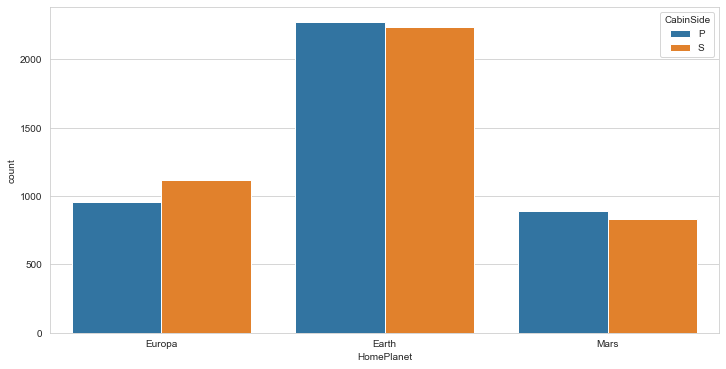

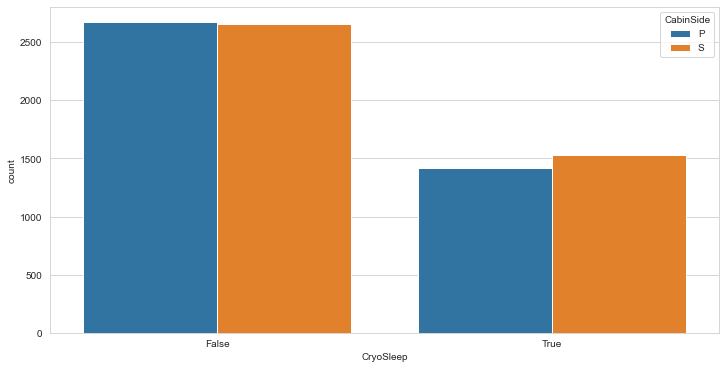

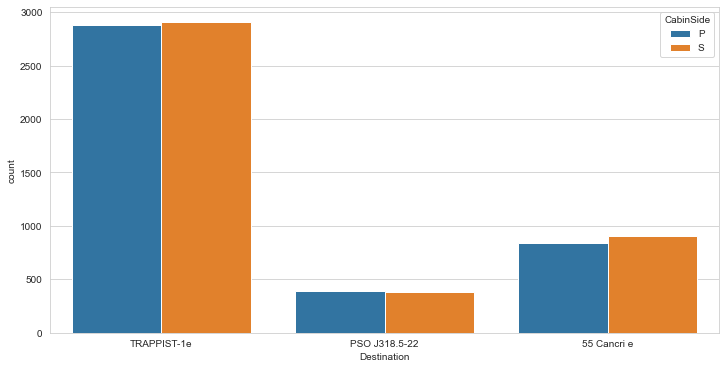

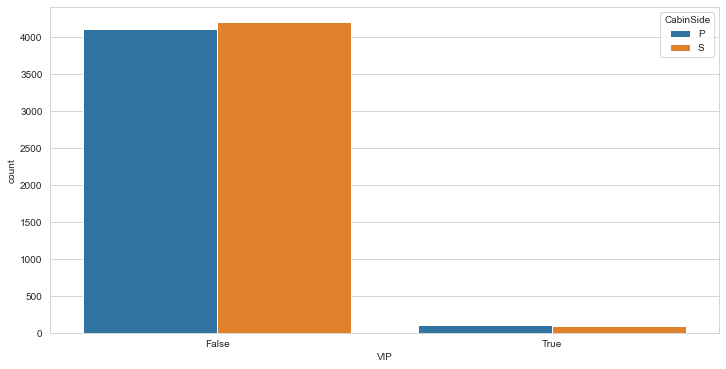

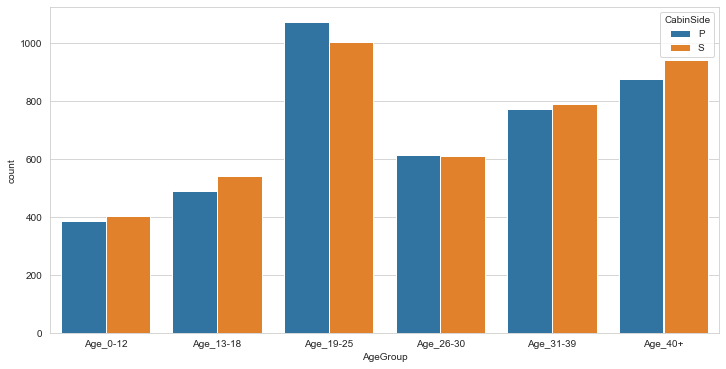

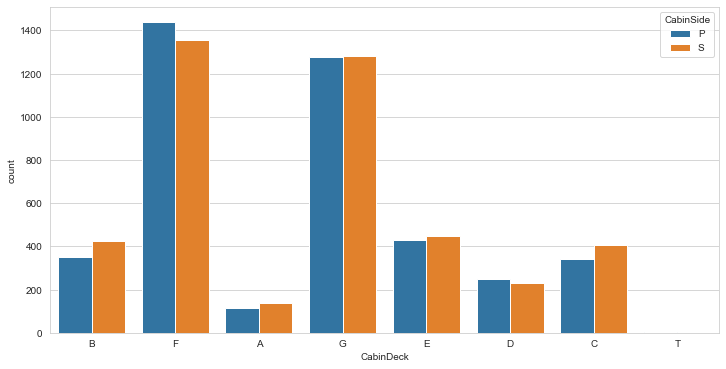

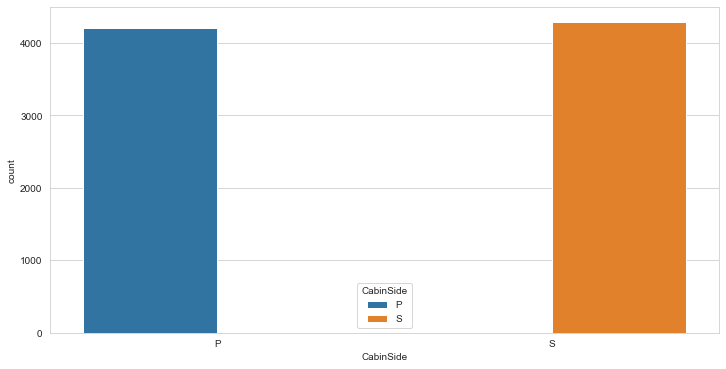

In [3954]:
# compare CabinSide with all other columns by ploting
for col in label_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, data=train, hue='CabinSide')

<AxesSubplot: xlabel='Age', ylabel='LuxurySpending'>

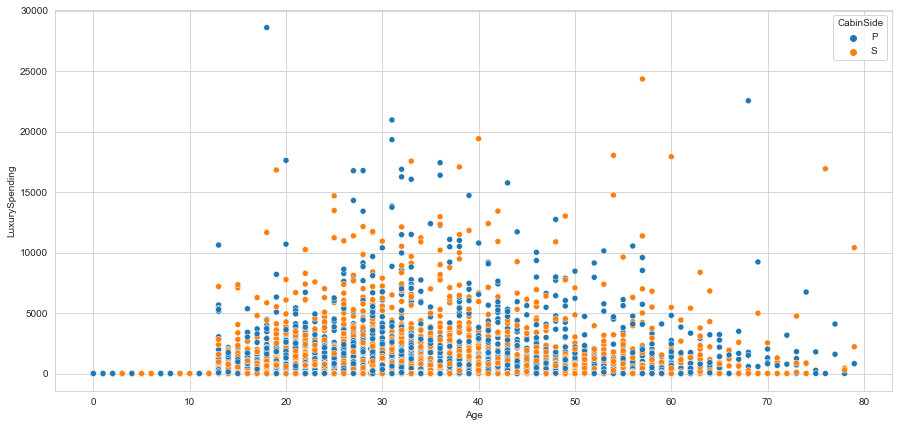

In [3955]:
# draw scatterplot for Age and LuxurySpending column hue by CabinSide column
plt.figure(figsize=(15, 7))
sns.scatterplot(x='Age', y='LuxurySpending', data=train, hue='CabinSide')

<AxesSubplot: xlabel='Age', ylabel='EssentialSpending'>

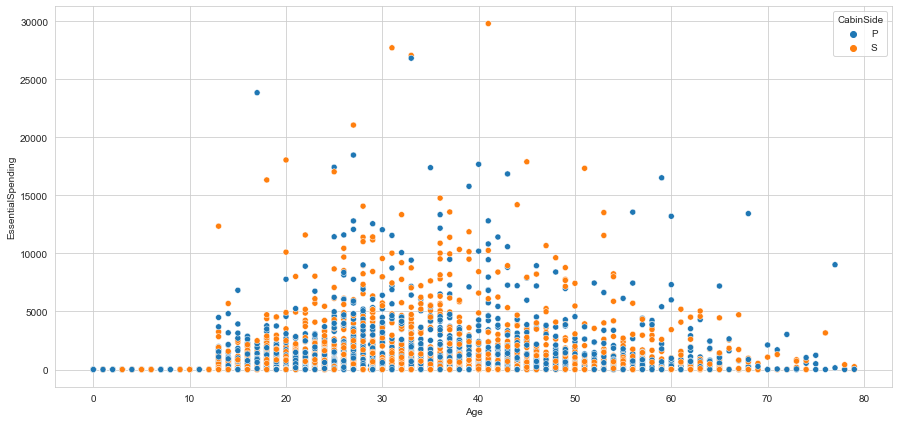

In [3956]:
# draw scatterplot for Age and EssentialSpending column hue by CabinSide column
plt.figure(figsize=(15, 7))
sns.scatterplot(x='Age', y='EssentialSpending', data=train, hue='CabinSide')

##### Destination

<AxesSubplot: xlabel='Destination', ylabel='count'>

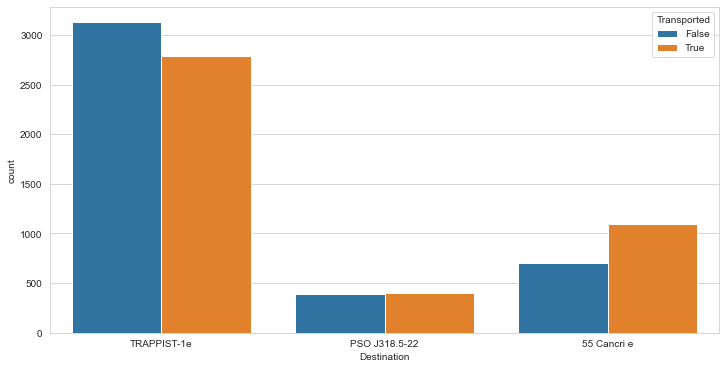

In [3957]:
# draw countplot for Destination column hue by Transported column
plt.figure(figsize=(12, 6))
sns.countplot(x='Destination', data=train, hue='Transported')

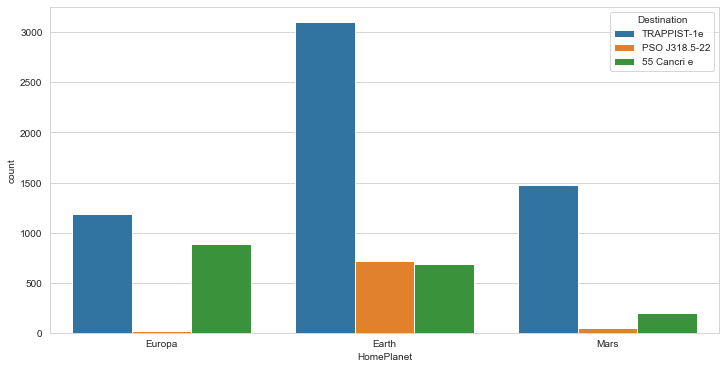

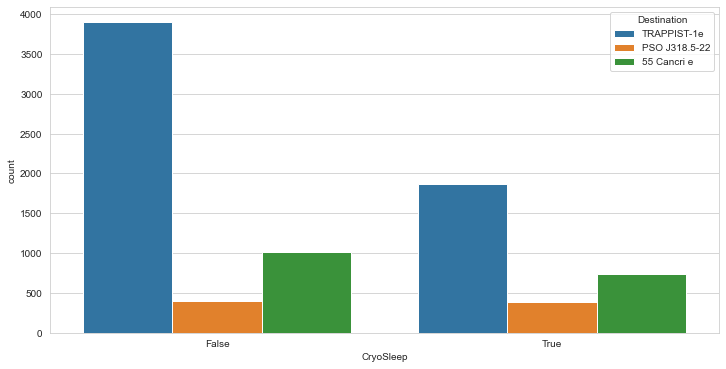

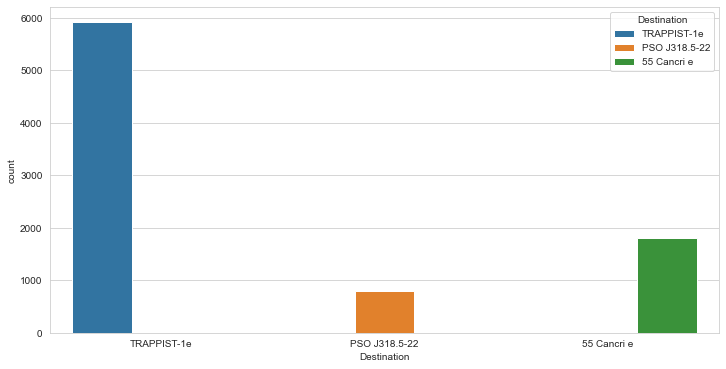

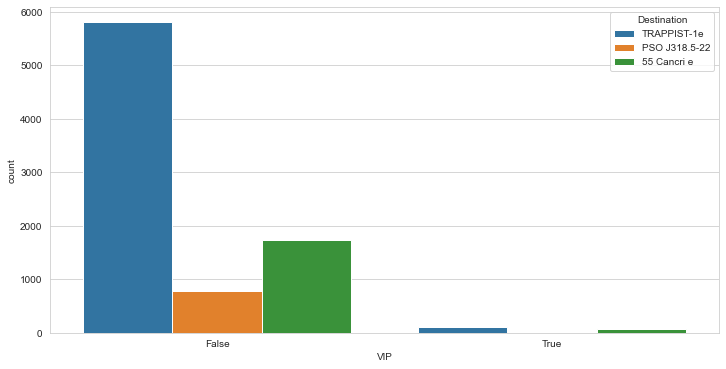

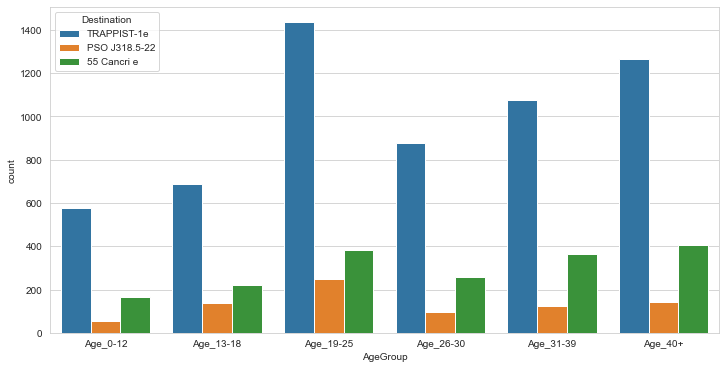

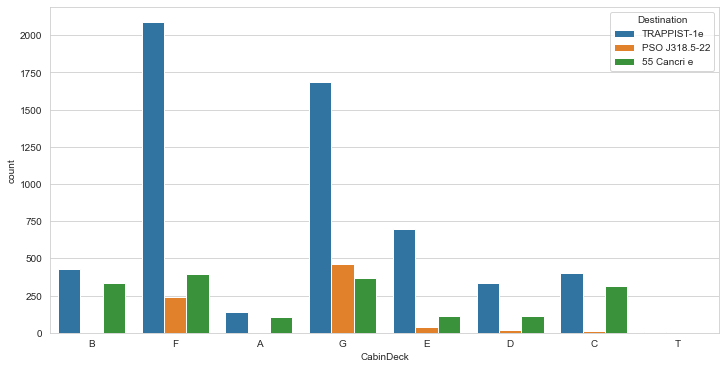

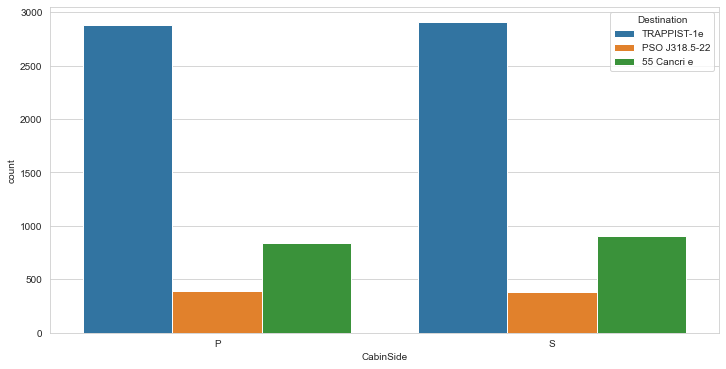

In [3958]:
# compare Destination with all other columns by ploting
for col in label_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, data=train, hue='Destination')

In [3959]:
# filter train[(train['HomePlanet'].isna()) & (train['CabinDeck'] == 'G')] and fill HomePlanet with 'Earth'
train.loc[(train['Destination'].isna()) & (train['HomePlanet'].isin(['Mars','Earth'])), 'Destination'] = 'TRAPPIST-1e'
test.loc[(test['Destination'].isna()) & (test['HomePlanet'].isin(['Mars','Earth'])), 'Destination'] = 'TRAPPIST-1e'

##### HomePlanet

<AxesSubplot: xlabel='HomePlanet', ylabel='count'>

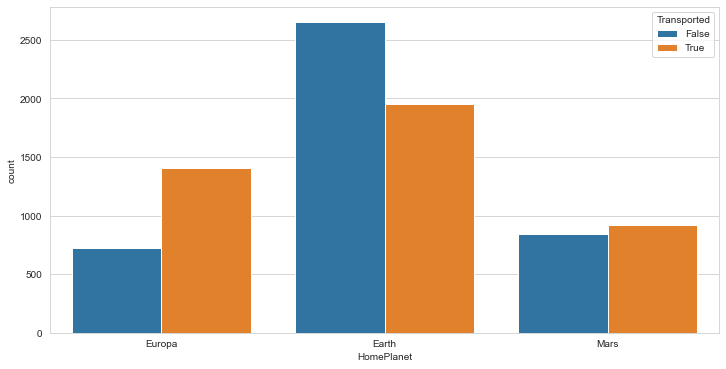

In [3960]:
# draw countplot for HomePlanet column hue by Transported column
plt.figure(figsize=(12, 6))
sns.countplot(x='HomePlanet', data=train, hue='Transported')

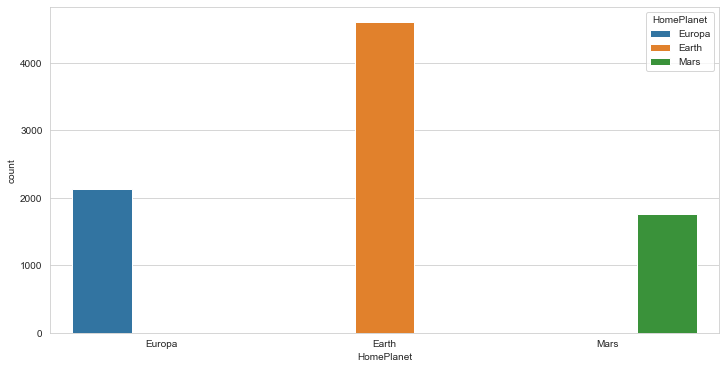

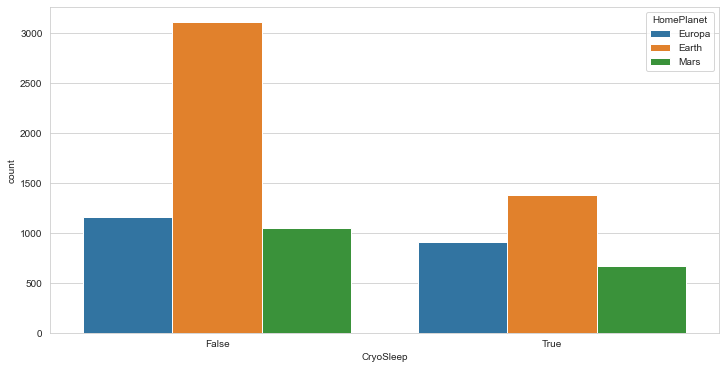

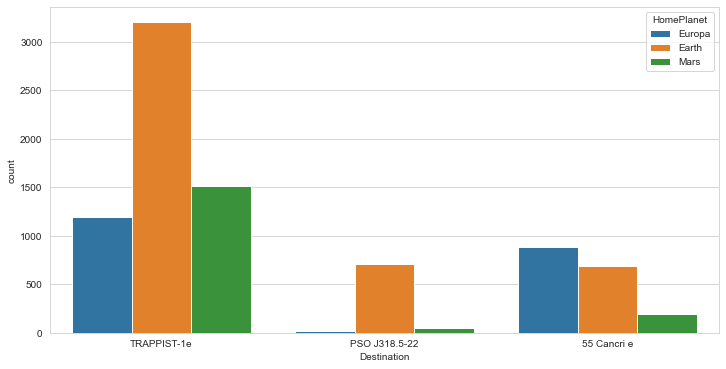

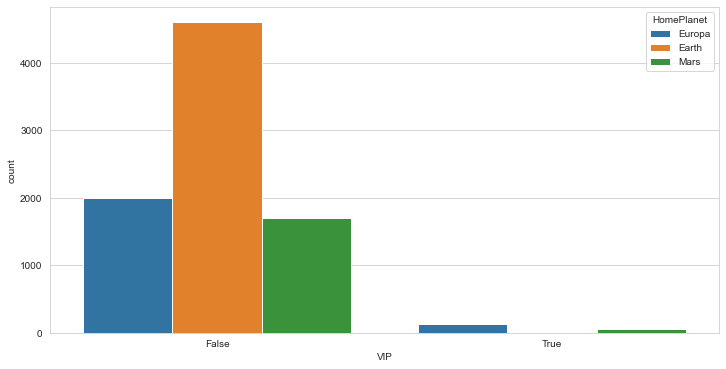

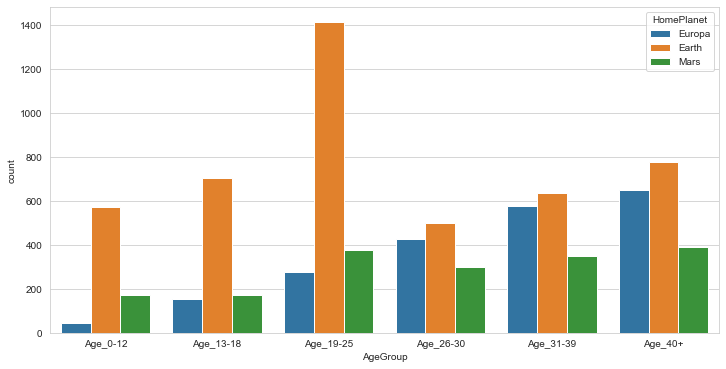

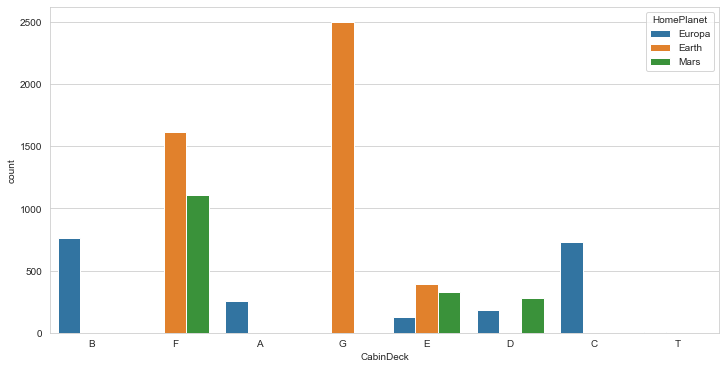

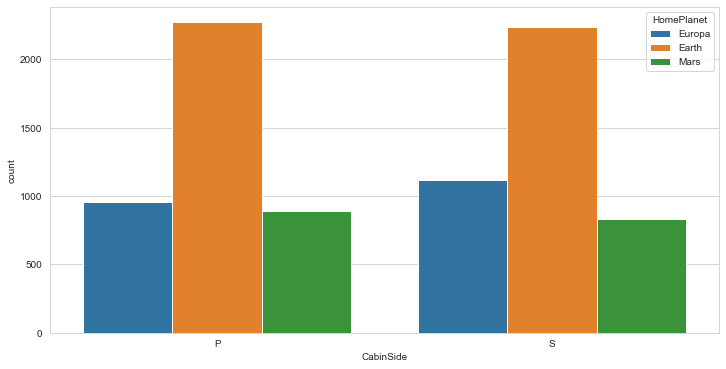

In [3961]:
# compare HomePlanet with all other columns by ploting
for col in label_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, data=train, hue='HomePlanet')

In [3962]:
# filter train[(train['HomePlanet'].isna()) & (train['CabinDeck'] == 'G')] and fill HomePlanet with 'Earth'
train.loc[(train['HomePlanet'].isna()) & (train['CabinDeck'] == 'G'), 'HomePlanet'] = 'Earth'
test.loc[(test['HomePlanet'].isna()) & (test['CabinDeck'] == 'G'), 'HomePlanet'] = 'Earth'

# filter train[(train['HomePlanet'].isna()) & (train['Destination'] == 'PSO J318.5-22')] and fill HomePlanet with 'Earth'
train.loc[(train['HomePlanet'].isna()) & (train['Destination'] == 'PSO J318.5-22'), 'HomePlanet'] = 'Earth'
test.loc[(test['HomePlanet'].isna()) & (test['Destination'] == 'PSO J318.5-22'), 'HomePlanet'] = 'Earth'

# filter train[train['HomePlanet'].isna() & (train['Age'] <= 25)] and fill HomePlanet with 'Earth'
train.loc[train['HomePlanet'].isna() & (train['Age'] <= 25), 'HomePlanet'] = 'Earth'
test.loc[test['HomePlanet'].isna() & (test['Age'] <= 25), 'HomePlanet'] = 'Earth'

# train[train['HomePlanet'].isna() & (train['LuxurySpending'] >= 2000)] and fill HomePlanet with 'Europa'
train.loc[train['HomePlanet'].isna() & (train['LuxurySpending'] >= 2000), 'HomePlanet'] = 'Europa'
test.loc[test['HomePlanet'].isna() & (test['LuxurySpending'] >= 2000), 'HomePlanet'] = 'Europa'

In [3963]:
# # draw jointplot for Age and TotalSpending columns hue by HomePlanet column
# plt.figure(figsize=(15, 7))
# sns.swarmplot(x='Age', y='LuxurySpending', data=train, hue='HomePlanet', marker='o')
# plt.xticks(rotation=90)

### Encoding

In [3964]:
# impute missing values with mode
label_cols = ['CryoSleep', 'VIP', 'CabinDeck', 'CabinSide', 'Destination', 'HomePlanet', 'AgeGroup']
for col in label_cols:
    train[col].fillna(train[col].mode()[0], inplace=True)
    test[col].fillna(test[col].mode()[0], inplace=True)

In [3965]:
print(train.isna().sum())
print(' ')
print(test.isna().sum())

HomePlanet           0
CryoSleep            0
Destination          0
Age                  0
VIP                  0
Transported          0
AgeGroup             0
IsChild              0
LuxurySpending       0
EssentialSpending    0
AnySpending          0
Group                0
GroupSize            0
Solo                 0
FamilySize           0
CabinDeck            0
CabinSide            0
dtype: int64
 
HomePlanet           0
CryoSleep            0
Destination          0
Age                  0
VIP                  0
AgeGroup             0
IsChild              0
LuxurySpending       0
EssentialSpending    0
AnySpending          0
Group                0
GroupSize            0
Solo                 0
FamilySize           0
CabinDeck            0
CabinSide            0
dtype: int64


In [3966]:
# label encode categorical columns
for col in label_cols:
    train[col] = LabelEncoder().fit_transform(train[col].astype('str'))
    test[col] = LabelEncoder().fit_transform(test[col].astype('str'))

In [3967]:
%%script echo skipped
# one-hot encode HomePlanet, Destination, CabinDeck, AgeGroup columns
onehot_cols = ['HomePlanet', 'Destination', 'CabinDeck', 'AgeGroup', 'GroupSize', 'FamilySize']
for col in onehot_cols:
    train[col] = train[col].astype('category')
    train[col] = train[col].cat.codes
    encoder = OneHotEncoder()
    encoded = pd.DataFrame(encoder.fit_transform(train[[col]]).toarray(), columns=[col + str(int(i)) for i in range(encoder.categories_[0].shape[0])])
    train = pd.concat([train, encoded], axis=1)

for col in onehot_cols:
    test[col] = test[col].astype('category')
    test[col] = test[col].cat.codes
    encoder = OneHotEncoder()
    encoded = pd.DataFrame(encoder.fit_transform(test[[col]]).toarray(), columns=[col + str(int(i)) for i in range(encoder.categories_[0].shape[0])])
    test = pd.concat([test, encoded], axis=1)

train.drop(columns=onehot_cols, inplace=True)
test.drop(columns=onehot_cols, inplace=True)

skipped


### Scaling

In [3968]:
train[['Age', 'LuxurySpending', 'EssentialSpending']].describe()

,Age,LuxurySpending,EssentialSpending
count,8693.00,8693.00,8693.00
mean,28.79,823.29,618.25
std,14.35,1830.95,1696.44
min,0.00,0.00,0.00
25%,20.00,0.00,0.00
50%,27.00,60.00,3.00
75%,37.00,849.00,601.00
max,79.00,28600.00,29813.00


In [3970]:
# minmax scale Age, LuxurySpending, EssentialSpending
scaler = MinMaxScaler()
train[['Age', 'LuxurySpending', 'EssentialSpending']] = scaler.fit_transform(train[['Age', 'LuxurySpending', 'EssentialSpending']])
test[['Age', 'LuxurySpending', 'EssentialSpending']] = scaler.transform(test[['Age', 'LuxurySpending', 'EssentialSpending']])

In [ ]:
train[['Age', 'LuxurySpending', 'EssentialSpending']].describe()

,Age,LuxurySpending,EssentialSpending
count,8693.00,8693.00,8693.00
mean,0.36,0.03,0.02
std,0.18,0.06,0.06
min,0.00,0.00,0.00
25%,0.25,0.00,0.00
50%,0.34,0.00,0.00
75%,0.47,0.03,0.02
max,1.00,1.00,1.00


### Heatmap of all features

<AxesSubplot: >

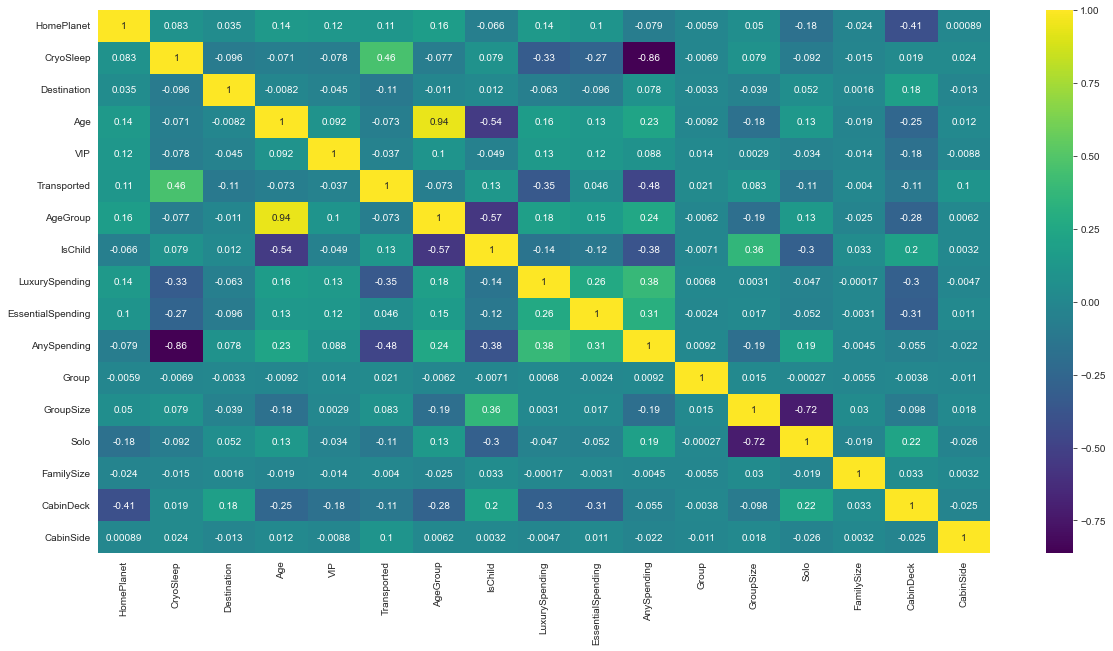

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(train.corr(), annot=True, cmap='viridis')

# Model and Submission

In [ ]:
# split train set into train and validation sets
X = train.drop('Transported', axis=1)
y = train['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [ ]:
def hyperparameter_tuner(X_train, y_train, model, scoring, kfold, n_jobs, random_state=42, verbose=1):
    if model == 'logistic_regression':
        logistic = LogisticRegression(solver='liblinear', max_iter=1000, random_state=random_state)
        penalty = ['l1', 'l2']
        C = np.logspace(0, 4, 10)
        grid = dict(C=C, penalty=penalty)
        clf = GridSearchCV(estimator=logistic, param_grid=grid, scoring=scoring, cv=kfold, n_jobs=n_jobs, verbose=verbose)
        best_model = clf.fit(X_train, y_train)

    elif model == 'k_neighbors_classifier':
        knn = KNeighborsClassifier()
        n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 50, num = 50)]
        weights = ['uniform', 'distance']
        algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
        grid = dict(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm)
        clf = GridSearchCV(estimator=knn, param_grid=grid, scoring=scoring, cv=kfold, n_jobs=n_jobs, verbose=verbose)
        best_model = clf.fit(X_train, y_train)
    
    elif model == 'svc':
        svm = SVC(random_state=random_state)
        kernel = ['poly', 'sigmoid']
        degree = [int(x) for x in np.linspace(start = 1, stop = 3, num = 3)]
        gamma = [1, 0.1, 0.01]
        C = [0.1, 1, 10]
        grid = dict(kernel=kernel, degree=degree, gamma=gamma, C=C)
        clf = GridSearchCV(estimator=svm, param_grid=grid, scoring=scoring, cv=kfold, n_jobs=n_jobs, verbose=verbose)
        best_model = clf.fit(X_train, y_train)

    elif model == 'decision_tree_classifier':
        decision_tree = DecisionTreeClassifier(random_state=random_state)
        criterion = ['gini', 'entropy']
        splitter = ['best', 'random']
        max_depth = [int(x) for x in np.linspace(1, 8, num = 8)]
        min_samples_split = [4, 8, 16] #[2, 4, 8, 16]
        min_samples_leaf = [2, 4, 8] #[1, 2, 4, 8]
        grid = dict(criterion=criterion, splitter=splitter, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
        clf = GridSearchCV(estimator=decision_tree, param_grid=grid, scoring=scoring, cv=kfold, n_jobs=n_jobs, verbose=verbose)
        best_model = clf.fit(X_train, y_train)

    elif model == 'random_forest_classifier':
        random_forest = RandomForestClassifier(random_state=random_state)
        n_estimators = [100, 200, 400, 600]
        max_depth = [int(x) for x in np.linspace(1, 8, num = 8)]
        min_samples_split = [4, 8] #[2, 4, 8, 16]
        min_samples_leaf = [2, 4] #[1, 2, 4, 8]
        bootstrap = [True, False]
        grid = dict(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, bootstrap=bootstrap)
        clf = GridSearchCV(estimator=random_forest, param_grid=grid, scoring=scoring, cv=kfold, n_jobs=n_jobs, verbose=verbose)
        best_model = clf.fit(X_train, y_train)

    elif model == 'gradient_boosting_classifier':
        gradient_boosting = GradientBoostingClassifier(random_state=random_state)
        n_estimators = [100, 200, 400, 600]
        learning_rate = [0.001, 0.01, 0.1, 1]
        max_depth = [int(x) for x in np.linspace(1, 4, num = 4)]
        min_samples_split = [4, 8] #[2, 4, 8, 16]
        min_samples_leaf = [2, 4] #[1, 2, 4, 8]
        grid = dict(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
        clf = GridSearchCV(estimator=gradient_boosting, param_grid=grid, scoring=scoring, cv=kfold, n_jobs=n_jobs, verbose=verbose)
        best_model = clf.fit(X_train, y_train)

    elif model == 'ada_boost_classifier':
        ada_boost = AdaBoostClassifier(random_state=random_state)
        n_estimators = [100, 200, 400, 600]
        learning_rate = [0.001, 0.01, 0.1, 1]
        algorithm = ['SAMME', 'SAMME.R']
        grid = dict(n_estimators=n_estimators, learning_rate=learning_rate, algorithm=algorithm)
        clf = GridSearchCV(estimator=ada_boost, param_grid=grid, scoring=scoring, cv=kfold, n_jobs=n_jobs, verbose=verbose)
        best_model = clf.fit(X_train, y_train)

    elif model == 'bagging_classifier':
        bagging = BaggingClassifier(random_state=random_state)
        n_estimators = [100, 200, 400, 600]
        max_samples = [1, 2, 4, 8, 16, 32]
        max_features = [int(x) for x in np.linspace(1, len(X_train.columns), num = len(X_train.columns))]
        bootstrap = [True, False]
        grid = dict(n_estimators=n_estimators, max_samples=max_samples, max_features=max_features, bootstrap=bootstrap)
        clf = GridSearchCV(estimator=bagging, param_grid=grid, scoring=scoring, cv=kfold, n_jobs=n_jobs, verbose=verbose)
        best_model = clf.fit(X_train, y_train)

    elif model == 'xgb_classifier':
        xgboost = XGBClassifier(random_state=random_state)
        learning_rate = [0.001, 0.01, 0.1]
        n_estimators = [100, 200, 400, 600]
        max_depth = [int(x) for x in np.linspace(1, 6, num = 6)]
        subsample = [0.5, 0.75, 1.0]
        colsample_bytree = [0.5, 0.75, 1.0]
        grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth, subsample=subsample, colsample_bytree=colsample_bytree)
        clf = GridSearchCV(estimator=xgboost, param_grid=grid, scoring=scoring, cv=kfold, n_jobs=n_jobs, verbose=verbose)
        best_model = clf.fit(X_train, y_train)

    elif model == 'lgbm_classifier':
        lightgbm = LGBMClassifier(random_state=random_state)
        learning_rate = [0.001, 0.01, 0.1]
        n_estimators = [200, 400, 600, 800]
        max_depth = [int(x) for x in np.linspace(1, 6, num = 6)]
        subsample = [0.5, 0.75, 1.0]
        colsample_bytree = [0.5, 0.75, 1.0]
        grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth, subsample=subsample, colsample_bytree=colsample_bytree)
        clf = GridSearchCV(estimator=lightgbm, param_grid=grid, scoring=scoring, cv=kfold, n_jobs=n_jobs, verbose=verbose)
        best_model = clf.fit(X_train, y_train)
    
    elif model == 'catb_classifier':
        catboost = CatBoostClassifier(random_state=random_state, verbose=verbose, eval_metric='Accuracy')
        learning_rate = [0.001, 0.01, 0.1]
        n_estimators = [200, 400, 600, 800]
        max_depth = [int(x) for x in np.linspace(1, 6, num = 6)]
        grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)
        clf = GridSearchCV(estimator=catboost, param_grid=grid, scoring=scoring, cv=kfold, n_jobs=n_jobs, verbose=verbose)
        best_model = clf.fit(X_train, y_train.astype('float'))

    else:
        print('Invalid model name')
    return best_model

def model_evaluator(X_train, X_test, y_train, y_test, model, target_type):
    print(model.best_params_)
    print(model.best_estimator_)
    y_pred = model.predict(X_test)
    if target_type == 'classification':
        y_pred_proba = model.predict_proba(X_test)[:,1]
        # create a dataframe with train and test performance metrics
        train_acc = accuracy_score(y_train, model.predict(X_train))*100
        test_acc = accuracy_score(y_test, y_pred)*100
        train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:,1])*100
        test_auc = roc_auc_score(y_test, y_pred_proba)*100
        train_recall = recall_score(y_train, model.predict(X_train))*100
        test_recall = recall_score(y_test, y_pred)*100
        train_precision = precision_score(y_train, model.predict(X_train))*100
        test_precision = precision_score(y_test, y_pred)*100
        train_f1 = f1_score(y_train, model.predict(X_train))*100
        test_f1 = f1_score(y_test, y_pred)*100
        metrics = pd.DataFrame({'Train': [train_acc, train_auc, train_recall, train_precision, train_f1],
                                'Test': [test_acc, test_auc, test_recall, test_precision, test_f1]},
                                index=['Accuracy', 'AUC', 'Recall', 'Precision', 'F1'])
        print(metrics)
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        # plot ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve')
        plt.legend(loc="lower right")
        plt.show()

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
{'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 400, 'subsample': 0.5}
LGBMClassifier(learning_rate=0.01, max_depth=6, n_estimators=400,
               random_state=42, subsample=0.5)
           Train  Test
Accuracy   83.75 80.10
AUC        92.74 90.29
Recall     84.87 80.82
Precision  83.20 79.91
F1         84.03 80.36
[[685 178]
 [168 708]]
              precision    recall  f1-score   support

       False       0.80      0.79      0.80       863
        True       0.80      0.81      0.80       876

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



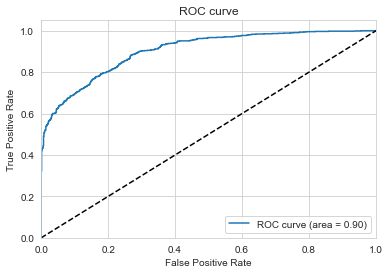

In [ ]:
best_model = hyperparameter_tuner(X_train, y_train, model='lgbm_classifier', scoring='accuracy', kfold=5, n_jobs=6, random_state=42, verbose=1)
model_evaluator(X_train, X_test, y_train, y_test, model=best_model, target_type='classification')

In [ ]:
# make predictions on test data using the best model
y_pred = best_model.predict(test)

# save predictions to a csv file
submission = pd.DataFrame({'PassengerId': submission['PassengerId'], 'Transported': y_pred.astype(bool)})
submission.to_csv('submission.csv', index=False)
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [ ]:
a = pd.read_csv('submission.csv')
b = pd.read_csv('(0.80476) submission-lgbm+stratify=y.csv')

# compare which rows are different between the two submissions
a[a['Transported'] != b['Transported']]

,PassengerId,Transported


In [ ]:
print(a['Transported'].value_counts())
print(b['Transported'].value_counts())

True     2227
False    2050
Name: Transported, dtype: int64
True     2227
False    2050
Name: Transported, dtype: int64
